# Punto 1 - Modelos de clasificación

A continuación, se explica todos los puntos para desarrollar el proyecto

**Autores:**

- Lady Johana Espana Gamboa.
- Mateo Olaya Aricapa.
- Sebastián García Nuñez.

**Introducción:**

El proyecto consiste en analizar, desarrollar y aplicar diferentes arquitecturas de modelos orientados al procesamiento de lenguaje natural (PLN) con el propósito de resolver una problemática a través de la clasificación de textos basados en normativas y políticas que tiene definido la plataforma de Reddit.

Entre las arquitecturas a implementar en el proyecto se encuentran las redes recurrentes (RNN) y el transformer. A raíz de esto, se busca entrenar dos modelos LSTM y GRU, y dos modelos transformers con hiperparámetros modificados. Todo esto con el objetivo comparar estos modelos y lograr encontrar el mejor modelo que clasifique los comentarios según las categorías establecidas.

- El dataset seleccionado "Reddit Macro Norm Violations" contiene comentarios eliminados de Reddit (2016-2017), donde fueron organizados por categorías a partir de las violaciones a normas definidas en las políticas de la plataforma.

- El dataset se extrajo de la plataforma Kaggle en el siguiente link: https://www.kaggle.com/datasets/michaelhabib/reddit-rule-violations-chandrasekharan-and-gilbert?select=macro-norm-violations-n10-t3-opposing-political-views-trump.csv

**Marco teórico:**

El presente marco teórico se fundamenta en tres áreas centrales del conocimiento: procesamiento de lenguaje natural, redes recurrentes y transformers. La integración de estos marcos permitiran concretar la solución planteada en este proyecto.

* **Procesamiento de lenguaje natural (NLP):** es un subcampo de la informática y la inteligencia artificila que emplea el machine learning para permitir que las computadoras comprendan y se comuniquen con el lenguaje natural, mediante la combinación de la linguistica computacional, el modelo estadístico, el machine learning y el aprendizaje profundo [1]. A raíz de lo anterior, el NLP tendrá como enfoque la detención automatizada de discursos o comentarios tóxicos o violaciones a la normativas.

* **Redes neuronales recurrentes (RNN):** es una red neuronal profunda que se entrena con datos secuenciales o de series temporales para crear un modelo de machine learning que pueda hacer predicciones o conclusiones secuenciales basándose en entradas secuenciales [2]. En este caso, se revisarán las arquitecturas LSTM y GRU para procesar secuencias de texto con tal de extraer características importantes, y de ese modo, lograr clasificar comentarios.

* **Transformer:** es un tipo de arquitectura de redes neuronales que destaca en el procesamiento de datos secuenciales, asociado sobre todo a los modelos de lenguaje de gran tamaño (LLM). Estos modelos han alcanzado un rendimiento de élite en otros campos de la inteligencia artificial, como la visión por ordenador, el reconocimiento de voz y la previsión de series temporales [3]. Con esta arquitectura se logra extraer más características importantes de todos los comentarios del proyecto a través de la implementación del bloque encoder.

**Descripción del problema a solucionar:**

La plataforma de Reddit quiere detectar comentarios que han violado las normativas y políticas de la empresa. Para ello, la empresa identificó 8 macro normas que se violan con frecuencia en la plataforma (insultos, ataques personales, pornografía, discurso de odio, entre otros). Para ello, se seleccionaron los 5.000 mejores ejemplos por cada tipo de norma violada. A continuación, se presentan los tipos de violaciones:

1. **Misogynistic slurs:** comentarios con insultos misóginos.
2. **Hate speech: discurso:** de odio racistau homofóbico.
3. **Opposing political views:** comentarios con posturas políticas opuestas en torno a Trump.
4. **Verbal attacks on Reddit:** ataques verbales hacia Reddit o comunidades específicas.
5. **Porn links:** enlaces a pornografía.
6. **Personal attacks:** ataques personales directos.
7. **Abusing/criticizing moderators:** abusar o criticar a moderadores.
8. **Name-calling:** insultos a acusar a otros de ser demasiado sensibles.

Como resultado, la empresa contrata a ingenieros de IA y ciencias de datos que permitan identificar estos comentarios para eliminarlos en las secciones de comentarios que tiene la plataforma.

**Planteamiento de la solución:**

Inicialmente, se propone trabajar con los modelos LSTM y GRU de las redes recurrentes para clasificar los comentarios que hayan violado una normativa. Posteriormente, se integrará el tranformer donde se usará el bloque encoder que permite extraer características importantes de todo el corpus con tal de lograr este objetivo.

Por otro lado, se utilizan 5 tipos de normativas para definir las categorías que generarán como salida cada modelo. Esto son los siguientes:

- **misogynistic:** macro-norm-violations-n10-t0-misogynistic-slurs.
- **verbal-attacks-reddit:** macro-norm-violations-n10-t4-verbal-attacks-on-Reddit.
- **personal-attacks:** macro-norm-violations-n10-t8-personal-attacks.
- **racist-homophobic:** macro-norm-violations-n15-t2-hatespeech-racist-homophobic.
- **verbal-attacks-sensitive:** macro-norm-violations-n15-t9-namecalling-claiming-other-too-sensitive.

# Configuraciones entorno

In [ ]:
import sys

In [ ]:
IS_COLAB = "google-colab" in sys.modules

if IS_COLAB:
  import os
  os.environ["TF_USE_LEGACY_KERAS"] = "1"
  import tf_keras

In [ ]:
"""
  Se instala tensorflow si se usa el entorno con TPU
  para google colab
"""
!pip install -q tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 737.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 145.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 124.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


2.20.0


In [ ]:
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Conjunto de datos

In [ ]:
# Librerías a trabajar
import pandas as pd

In [ ]:
"""
 En este apartado se establecen las 5 categorías a usar para
 el modelo clasificador. Por lo tanto, cada una tiene el siguiente significado:

 1. misogynistic            : comentarios con insultos misóginos.
 2. verbal-attacks-reddit   : comentarios con ataques verbales hacia reddit o comunidades específicas.
 3. personal-attacks        : comentarios con ataques personales directos.
 4. racist-homophobic       : comentarios con discursos de odio, racista u homofóbicos.
 5. verbal-attacks-sensitive: comentarios con insultos a otros de ser demasiados sensibles.
"""

names_dataset = {
    "misogynistic"            : "macro-norm-violations-n10-t0-misogynistic-slurs",
    "verbal-attacks-reddit"   : "macro-norm-violations-n10-t4-verbal-attacks-on-Reddit",
    "personal-attacks"        : "macro-norm-violations-n10-t8-personal-attacks",
    "racist-homophobic"       : "macro-norm-violations-n15-t2-hatespeech-racist-homophobic",
    "verbal-attacks-sensitive": "macro-norm-violations-n15-t9-namecalling-claiming-other-too-sensitive",
}

In [ ]:
# Importando cada dataset con las categorías establecidas
datasets    = {}
path_folder = "/content/drive/MyDrive/Proyecto Datos Secuenciales/Datasets/Reddit_Norm_Violations"

for category in names_dataset:
  path_file_dataset = f"{ path_folder }/{ names_dataset[category] }.csv"
  dataset           = pd.read_csv( path_file_dataset )

  # Guardándo cada dataset en su categoría correspondiente
  datasets[category] = dataset

In [ ]:
# Visualizando dataset
datasets['misogynistic'].head(3)

,what a dumb cunt lol what a pussy
0,nobody cares you dumb cunt
1,wow kinda dumb u and your cunt daughter
2,no one gives a fuck what this batshit communit...


In [ ]:
# Visualizando dataset
datasets['verbal-attacks-reddit'].head(3)

,holy shit this sub is filled with pathetic cancer go hang yourselves
0,why does this piece of shit sub reddit show up...
1,you re so cool you hang dead animal skulls up ...
2,your english sucks ass kys


In [ ]:
# Visualizando dataset
datasets['personal-attacks'].head(3)

,black lives matter you moron
0,uhhh fuck you white priviliged ablebodied moro...
1,islam isn t a race you fucking retard
2,islam is not a fucking race of people damnit


In [ ]:
# Visualizando dataset
datasets['racist-homophobic'].head(3)

,why the fuck are you trying to run flash on a god damn kindle you re a scrub kill yourself
0,god damn you re a faggot
1,say nigger you fucking faggot
2,kill yourself you nigger faggot im the fucking...


In [ ]:
# Visualizando dataset
datasets['verbal-attacks-sensitive'].head(3)

,go kill yourself you useless sack of meat
0,stop whining fucking cry baby
1,get off your fucking high horse princess daily...
2,why are you whining stfu you whining sack of shit


In [ ]:
# Revisando cantidad de datos por cada dataset
for category in datasets:
  print(f"Categoría: { category } | Total datos: { datasets[category].shape[0] }")

Categoría: misogynistic | Total datos: 5058
Categoría: verbal-attacks-reddit | Total datos: 5058
Categoría: personal-attacks | Total datos: 5058
Categoría: racist-homophobic | Total datos: 5058
Categoría: verbal-attacks-sensitive | Total datos: 5058


# Creación carpetas sobre los datasets

A continuación se crearan las carpetas que contienen cada categoría para las etapas:

- Entrenamiento (80%)
- Validación (10%)
- Pruebas (10%)

En esta parte, se busca que cada categoría contenga un 80% de datos de entrenamiento, un 10% de datos para validación y un 10% de datos para las pruebas.

In [ ]:
import os
from sklearn.model_selection import train_test_split

In [ ]:
# Carpeta principal donde se guarda todo
path_main_folder = "/content/drive/MyDrive/Proyecto Datos Secuenciales/Datasets/Reddit_Norm_Violations/dataset"

# Creando las carpetas train, test y val
os.makedirs( os.path.join(path_main_folder, "train"), exist_ok=True )
os.makedirs( os.path.join(path_main_folder, "val"), exist_ok=True )
os.makedirs( os.path.join(path_main_folder, "test"), exist_ok=True )

In [ ]:
# Creando carpeta de cada categoría en las carpetas: train, val, test
path_train = "/content/drive/MyDrive/Proyecto Datos Secuenciales/Datasets/Reddit_Norm_Violations/dataset_medium/train"
path_test  = "/content/drive/MyDrive/Proyecto Datos Secuenciales/Datasets/Reddit_Norm_Violations/dataset_medium/test"
path_val   = "/content/drive/MyDrive/Proyecto Datos Secuenciales/Datasets/Reddit_Norm_Violations/dataset_medium/val"

for category in datasets:
  # Creando carpeta en cada directorio
  os.makedirs( os.path.join(path_train, category), exist_ok=True )
  os.makedirs( os.path.join(path_test, category), exist_ok=True )
  os.makedirs( os.path.join(path_val, category), exist_ok=True )

### Dataset medium

In [ ]:
"""
  La lógica en esta parte consiste en dividir el dataset
  para obtener las siguientes porciones:

  - Total de datos: 5.058
  - Mitad de los datos: 2.529

  Por lo tanto, el resultado 2.529 se dividen en 80% para train,
  10% para test y 10% para valid:

  - Total de datos ahora: 2.529
  - Dataset train: 2023
  - Dataset test: 253
  - Dataset valid: 253
"""
for category in datasets:
  dataset = datasets[ category ]

  # Obteniendo el 50% del total de datos que tiene dicha categoría
  dataset_medium, temp_medium = train_test_split( dataset, test_size=0.5, random_state=42 )

  # Datos train, valid, test
  train, temp = train_test_split( dataset_medium, test_size=0.2, random_state=42 )
  valid, test = train_test_split( temp, test_size=0.5, random_state=42 )

  # Tomando ruta de cada categoría en cada carpeta train, test y valid
  path_train_category = f"{ path_train }/{ category }"
  path_test_category  = f"{ path_test }/{ category }"
  path_vali_category  = f"{ path_val }/{ category }"

  # -----------------------------------------------------------------------------
  # Guardar train
  # -----------------------------------------------------------------------------
  for i, comentario in enumerate( train.iloc[:, 0] ):
    # Nombre del archivo
    filename = os.path.join(path_train_category, f"{category}_train_{i}.txt")

    # Guardando comentario en el archivo
    with open( filename, "w", encoding="utf-8" ) as file:
      file.write( comentario )

  # -----------------------------------------------------------------------------
  # Guardar valid
  # -----------------------------------------------------------------------------
  for i, comentario in enumerate( valid.iloc[:, 0] ):
    # Nombre del archivo
    filename = os.path.join(path_vali_category, f"{category}_val_{i}.txt")

    # Guardando comentario en el archivo
    with open( filename, "w", encoding="utf-8" ) as file:
      file.write( comentario )

  # -----------------------------------------------------------------------------
  # Guardar test
  # -----------------------------------------------------------------------------
  for i, comentario in enumerate( test.iloc[:, 0] ):
    # Nombre del archivo
    filename = os.path.join(path_test_category, f"{category}_test_{i}.txt")

    # Guardando comentario en el archivo
    with open( filename, "w", encoding="utf-8" ) as file:
      file.write( comentario )

### Dataset small

In [ ]:
"""
  La lógica en esta parte consiste en dividir el dataset
  para obtener las siguientes porciones:

  - Total de datos: 5.058
  - Datos pequeños: 1.500

  Por lo tanto, el resultado 1500 se dividen en 80% para train,
  10% para test y 10% para valid:

  - Total de datos ahora: 1.500
  - Dataset train: 1.200
  - Dataset test: 150
  - Dataset valid: 150
"""
for category in datasets:
  dataset = datasets[ category ]

  # Obteniendo el 30% del total de datos
  dataset_small, temp_small = train_test_split( dataset, test_size=0.7, random_state=42 )

  # Datos train, valid, test
  train, temp = train_test_split( dataset_small, test_size=0.2, random_state=42 )
  valid, test = train_test_split( temp, test_size=0.5, random_state=42 )

  # Tomando ruta de cada categoría en cada carpeta train, test y valid
  path_train_category = f"{ path_train }/{ category }"
  path_test_category  = f"{ path_test }/{ category }"
  path_vali_category  = f"{ path_val }/{ category }"

  # -----------------------------------------------------------------------------
  # Guardar train
  # -----------------------------------------------------------------------------
  for i, comentario in enumerate( train.iloc[:, 0] ):
    # Nombre del archivo
    filename = os.path.join(path_train_category, f"{category}_train_{i}.txt")

    # Guardando comentario en el archivo
    with open( filename, "w", encoding="utf-8" ) as file:
      file.write( comentario )

  # -----------------------------------------------------------------------------
  # Guardar valid
  # -----------------------------------------------------------------------------
  for i, comentario in enumerate( valid.iloc[:, 0] ):
    # Nombre del archivo
    filename = os.path.join(path_vali_category, f"{category}_val_{i}.txt")

    # Guardando comentario en el archivo
    with open( filename, "w", encoding="utf-8" ) as file:
      file.write( comentario )

  # -----------------------------------------------------------------------------
  # Guardar test
  # -----------------------------------------------------------------------------
  for i, comentario in enumerate( test.iloc[:, 0] ):
    # Nombre del archivo
    filename = os.path.join(path_test_category, f"{category}_test_{i}.txt")

    # Guardando comentario en el archivo
    with open( filename, "w", encoding="utf-8" ) as file:
      file.write( comentario )

### Dataset large

In [ ]:
"""
  A continuación se crearan las categorías por cada carpeta
  con la respectiva distribución del 80%, 10%, 10%.

  Para ello, se usará el objeto "train_test_split" que permite obtener
  al inicio un 80% de entrenamiento y un 20% para prueba. Sin embargo,
  como se necesita los datos de validación entonces de los datos de prueba
  se dividen 50% y 50% para tener un 10% val y un 10% test.
"""
for category in datasets:
  dataset = datasets[ category ]

  # Datos train, valid, test
  train, temp = train_test_split( dataset, test_size=0.2, random_state=42 )
  valid, test = train_test_split( temp, test_size=0.5, random_state=42 )

  # Tomando ruta de cada categoría en cada carpeta train, test y valid
  path_train_category = f"{ path_train }/{ category }"
  path_test_category  = f"{ path_test }/{ category }"
  path_vali_category  = f"{ path_val }/{ category }"

  # -----------------------------------------------------------------------------
  # Guardar train
  # -----------------------------------------------------------------------------
  for i, comentario in enumerate( train.iloc[:, 0] ):
    # Nombre del archivo
    filename = os.path.join(path_train_category, f"{category}_train_{i}.txt")

    # Guardando comentario en el archivo
    with open( filename, "w", encoding="utf-8" ) as file:
      file.write( comentario )

  # -----------------------------------------------------------------------------
  # Guardar valid
  # -----------------------------------------------------------------------------
  for i, comentario in enumerate( valid.iloc[:, 0] ):
    # Nombre del archivo
    filename = os.path.join(path_vali_category, f"{category}_val_{i}.txt")

    # Guardando comentario en el archivo
    with open( filename, "w", encoding="utf-8" ) as file:
      file.write( comentario )

  # -----------------------------------------------------------------------------
  # Guardar test
  # -----------------------------------------------------------------------------
  for i, comentario in enumerate( test.iloc[:, 0] ):
    # Nombre del archivo
    filename = os.path.join(path_test_category, f"{category}_test_{i}.txt")

    # Guardando comentario en el archivo
    with open( filename, "w", encoding="utf-8" ) as file:
      file.write( comentario )

# Transformación de datos para Keras

En esta parte, se creara una dataset keras que permita
usarlo para crear los modelos.

In [ ]:
from tensorflow import keras

In [ ]:
"""
  Link documentación: https://keras.io/api/data_loading/text/

  - batch_size: indica que se formaran grupos de N cantidad de archivos
  para procesarse en un sólo paso de entrenamiento.

  En este caso, se conformaran grupos que contendrán 32 archivos de textos.
  Por lo tanto, si se revisa sólo la carpeta "train" se tiene un total de
  20.000 archivos, ya que por cada categoría hay 4000 archivos. Con esto,
  se concluye que se formaran 625 grupos (20.000/32) donde cada grupo
  tiene 32 archivos de textos o comentarios.

  Batch_1 -> 32 archivos o comentarios
  Batch_2 -> 32 archivos o comentarios
  Batch_3 -> 32 archivos o comentarios

  Batch_625 -> 32 archivos o comentarios

  Por otro lado, la asignación de la categoría a cada comentario,
  se hace apartir del orden alfabético que tienen las carpetas. En este caso,
  quedaría de la siguiente forma:

  - misogynistic → etiqueta 0
  - personal-attacks → etiqueta 1
  - racist-homophobic → etiqueta 2
  - verbal-attacks-reddit → etiqueta 3
  - verbal-attacks-sensitive → etiqueta 4
"""
batch_size = 32 # Poner 16, 32 o 64

train_dataset = keras.utils.text_dataset_from_directory(
    "/content/drive/MyDrive/Proyecto Datos Secuenciales/Datasets/Reddit_Norm_Violations/dataset_medium/train",
    batch_size = batch_size,
)

valid_dataset = keras.utils.text_dataset_from_directory(
    "/content/drive/MyDrive/Proyecto Datos Secuenciales/Datasets/Reddit_Norm_Violations/dataset_medium/val",
    batch_size = batch_size,
)

test_dataset = keras.utils.text_dataset_from_directory(
    "/content/drive/MyDrive/Proyecto Datos Secuenciales/Datasets/Reddit_Norm_Violations/dataset_medium/test",
    batch_size = batch_size,
)

Found 10115 files belonging to 5 classes.
Found 1265 files belonging to 5 classes.
Found 1265 files belonging to 5 classes.


In [ ]:
"""
 Dado que al crear el dataset con keras se crean pares de valores:

  (texto, etiqueta) = ("Texto 1...", 0)

  Entonces se busca eliminar esa etiqueta (label) del dataset keras
  de entrenamiento. Esto se hace para quedarse con la parte del texto
  que se necesita para generar el vocabulario en la capa tokenizer.
"""
def get_text_only(text, label):
  return text

dataset_text_vectorization = train_dataset.map( get_text_only )

In [ ]:
# Visualizando un batch del dataset keras
for texts, labels in train_dataset.take(1):
  print("Dimensiones del batch de textos: ", texts.shape)
  print("Dimensiones del batch de etiquetas: ", labels.shape)
  print("\nEjemplos dentro del batch: ")

  # Revisando los dos primeros comentarios con sus categorías del batch
  print("Comentario: ", texts.numpy()[:2])
  print("Categoría: ", labels.numpy()[:2])

Dimensiones del batch de textos:  (32,)
Dimensiones del batch de etiquetas:  (32,)

Ejemplos dentro del batch: 
Comentario:  [b'i wish i could kill every single one of you stupid retard piece of shit dumbass blind repulsive disgusting shitty fucking republicans rot in hell you utter pieces of fucking garbage i hope you all fucking die and go to hell and that your precious donald trump rapes you all in your eye sockets'
 b'you do realise there aren t just americans on this site right fucking stupid cunt']
Categoría:  [3 3]


# Capa tokenizer del modelo

En esta parte, se crea la capa tokenizer que cumple las siguientes funciones:

- **Estandarización:** se limpian las secuencias de texto para que estén todos en minusculas, sin comas, puntuaciones, entre otros.
- **Tokenizado:** se segmenta la secuencia de texto para convertir cada palabra en un token correspondiente.
- **Indexado:** se asigna un ID al token a partir de un vocabulario definido.

Es en esta etapa que se crea el vocabulario donde cada palabra (token) tiene asignado un ID. Además, la asignación y orden del ID depende de la frecuencia de dicha palabra en todo el corpus.

In [ ]:
from tensorflow.keras import layers

In [ ]:
"""
  Link documentación: https://keras.io/api/layers/preprocessing_layers/text/text_vectorization/

  Se explican las siguientes observaciones:

  - size sequence: indica el tamaño de la secuencia de texto
  que procesará la capa tokenizer.

  - size vocabulary: indica el tamaño del vocabulario que gestionará
  la capa tokenizer. Para este caso, el vocabulario tendrá 30.000
  tokens, empezando al inicio con el token con mayor frecuencia
  y así sucesivamente.

  Como punto a señalar, el token '' y [UNK] son tokens especiales que se usan
  para lo siguiente:

  Token: '' -> Padding.
  Token: [UNK] -> Cuando una palabra no está incluida en el vocabulario.
"""

size_sequence   = 600
size_vocabulary = 25000

tokenizer_layer = layers.TextVectorization(
    max_tokens=size_vocabulary,           # Tamaño vocabulario
    output_mode="int",                    # Salida: enteros tipo INT
    output_sequence_length=size_sequence, # Tamaño de las secuencias de texto
)

# Ejecutando proceso para construir vocabulario
#subset_dataset = dataset_text_vectorization.take(200) # Se toma una porción batch del dataset para construir el vocabulario
tokenizer_layer.adapt( dataset_text_vectorization )

In [ ]:
"""
  La interpretación es que aparecen los dos primeros tokens especiales: 0 y 1
  Después se muestran los tokens con mayor frecuencia que aparecen en el corpus.
  En este caso, el token con mayor frecuencia es la palabra "you" y le siguen los otros.
"""

# Revisando parte del vocabulario creado
for indice, token in enumerate( tokenizer_layer.get_vocabulary() ):
  print(f"índice: { indice } -> token: { token }")

  if indice == 1:
    print("------------------------------------")

  if indice == 10:
    break

índice: 0 -> token: 
índice: 1 -> token: [UNK]
------------------------------------
índice: 2 -> token: you
índice: 3 -> token: fuck
índice: 4 -> token: fucking
índice: 5 -> token: a
índice: 6 -> token: u
índice: 7 -> token: spez
índice: 8 -> token: and
índice: 9 -> token: the
índice: 10 -> token: your


In [ ]:
print( tokenizer_layer.get_vocabulary() )

['', '[UNK]', np.str_('you'), np.str_('fuck'), np.str_('fucking'), np.str_('a'), np.str_('u'), np.str_('spez'), np.str_('and'), np.str_('the'), np.str_('to'), np.str_('of'), np.str_('your'), np.str_('this'), np.str_('are'), np.str_('is'), np.str_('i'), np.str_('shit'), np.str_('re'), np.str_('yourself'), np.str_('child'), np.str_('stupid'), np.str_('t'), np.str_('in'), np.str_('people'), np.str_('cunt'), np.str_('go'), np.str_('r'), np.str_('that'), np.str_('hillary'), np.str_('bitch'), np.str_('it'), np.str_('for'), np.str_('all'), np.str_('trump'), np.str_('kill'), np.str_('like'), np.str_('on'), np.str_('clinton'), np.str_('reddit'), np.str_('off'), np.str_('s'), np.str_('get'), np.str_('with'), np.str_('up'), np.str_('idiot'), np.str_('who'), np.str_('stop'), np.str_('because'), np.str_('ass'), np.str_('what'), np.str_('just'), np.str_('no'), np.str_('faggot'), np.str_('so'), np.str_('me'), np.str_('trafficking'), np.str_('trafficker'), np.str_('retard'), np.str_('about'), np.str_(

In [ ]:
"""
 Cada batch tiene un conjunto de tuplas (text, label). Por lo tanto,
 cada texto se convierte a un vector índices para que se pueda procesar
 con el modelo.

 Para convertir el texto a vector índice se usa el vocabulario que tiene
 la capa tokenizer_layer.

 Por ejemplo:
 - (text, label)         -> ("this comments is racist", 1)
 - (text_indices, label) -> ([45 12 20 12 100, ...], 1)

 Esto se hace para cada dataset keras: train, valid, test.
"""

def convert_text_to_indices(text, label):
  text_to_indices = tokenizer_layer(text)

  return text_to_indices, label

# Aplicando transformación
train_dataset_indices = train_dataset.map( convert_text_to_indices, num_parallel_calls=4 )
valid_dataset_indices = valid_dataset.map( convert_text_to_indices, num_parallel_calls=4 )
test_dataset_indices  = test_dataset.map( convert_text_to_indices, num_parallel_calls=4 )

In [ ]:
"""
  El resultado que se aprecia aquí es el siguiente:

  - Comentarios: [
    [4   20 4076 ...    0    0    0],
    [17   93    5 ...    0    0    0],
  ]

  - Labels: [1 4]

  Nota: esto es de un sólo batch.

  Recordar que según el tamaño de la secuencia definido, si la secuencia
  de texto que está siendo procesada es menor a este tamaño, entonces rellenará
  con el índice 0 que corresponde al token '' padding.

  El tamaño de la secuencia es de 600. Por lo tanto:

  - Si un comentario tiene menos de 600 tokens, se rellena (padding) con 0 hasta alcanzar esa longitud.
  - Si un comentario tiene más de 600 tokens, se trunca y solo se conserva hasta la posición o token 600.
"""

# Visualizando un batch del dataset keras con los nuevos cambios
for texts, labels in train_dataset_indices.take(1):
  print("Dimensiones del batch de textos: ", texts.shape)
  print("Dimensiones del batch de etiquetas: ", labels.shape)
  print("\nEjemplos dentro del batch: ")

  # Revisando los dos primeros comentarios con sus categorías
  print("Comentarios: ", texts.numpy()[:2])
  print("Categorías: ", labels.numpy()[:2])

Dimensiones del batch de textos:  (32, 600)
Dimensiones del batch de etiquetas:  (32,)

Ejemplos dentro del batch: 
Comentarios:  [[ 2  3 40 ...  0  0  0]
 [ 3  9 30 ...  0  0  0]]
Categorías:  [0 3]


# Arquitecturas redes recurrentes

Para esta parte, se creará el modelo implementando dos tipos de arquitecturas RNN:

- Arquitectura LSTM.
- Arquitectura GRU.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def get_graph_history_train( history_train ):
  history_train = history_train.history

  # Gráfico de pérdida
  plt.figure(figsize=(8,4))
  plt.plot(history_train['loss'], label='Train Loss')
  plt.plot(history_train['val_loss'], label='Validation Loss')
  plt.title('Loss durante el entrenamiento')
  plt.xlabel('Épocas')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Gráfico de accuracy
  plt.figure(figsize=(8,4))
  plt.plot(history_train['accuracy'], label='Train Accuracy')
  plt.plot(history_train['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy durante el entrenamiento')
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

### Arquitectura LSTM

In [ ]:
"""
 Puntos importantes:

  1. shape: indica que el modelo recibirá vectores índices que
  representan una secuencia de texto como entrada.

  El valor "None" indica que la secuencia de texto de entrada
  puede tener una longitud variable. Por ejemplo, puede haber
  una secuencia de texto compuesta por 10 tokens (palabras) u otra secuencia
  compuesta por 50 tokens (palabras).

  2. dtype: indica el tipo de dato que será la entrada.

  En este caso, la entrada será un conjunto de secuencias de textos
  pero al pasarse por la capa "tokenizer" se convierten en vectores
  índices, donde sus valores son de tipo int64.

  Esa es la razón porque se agrega el valor "int64" a dicho parámetro.

  dtype="string" → esperarías texto literal (ej: "perro corre")
  dtype="int64" → esperarás IDs de tokens (ej: [12, 78])
"""

# Estableciendo capas arquitectura
#input_layer    = keras.Input( shape=(None,), dtype="int64" )
#embedded_layer = layers.Embedding( input_dim=size_vocabulary, output_dim=256, mask_zero=True )( input_layer )
#rnn_layer      = layers.Bidirectional( layers.LSTM( units=32 ) )( embedded_layer )
#x              = layers.Dropout( 0.6 )( rnn_layer )
#output_layer   = layers.Dense( units=5, activation="softmax" )( x )

# Estableciendo modelo
#model_norm_violations_LSTM = keras.Model( inputs=input_layer, outputs=output_layer )

# Estableciendo capas arquitectura
input_layer    = keras.Input( shape=(None,), dtype="int64" )
embedded_layer = layers.Embedding( input_dim=size_vocabulary, output_dim=256, mask_zero=True )( input_layer )
rnn_layer      = layers.Bidirectional( layers.LSTM( units=64 ) )( embedded_layer ) # 64 o 128
x              = layers.Dense( units=64, activation="relu" )( rnn_layer )
x              = layers.Dropout( 0.8 )( x )
output_layer   = layers.Dense( units=5, activation="softmax" )( x )

# Estableciendo modelo
model_norm_violations_LSTM = keras.Model( inputs=input_layer, outputs=output_layer )

In [ ]:
"""
  Link documentación: https://keras.io/api/models/model_training_apis/
  Link documentación: https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

  Puntos importantes a resaltar:

  1. Se usa una función de pérdida para medir el error
  llamada "sparse_categorical_crossentropy". Se selecciona este
  porque las etiquetas o categorias son enteros.

  Por ejemplo:

  (text, label) -> ("who are you...", 0)
  (text, label) -> ("what are you...", 1)
  (text, label) -> ("where are you...", 2)

  En caso de que las etiquetas fueran transformadas en formato
  one hot encoding entonces se usa "categorical_crossentropy".

  Por ejemplo:

  (text, label) -> ("who are you...", [1 0 0 0 ...])
  (text, label) -> ("what are you...", [0 1 0 0 ...])

  2. Se usa el optimizer "adam" para ajustar los pesos
  de toda la red de la arquitectura.
"""

# Definiendo configuraciones para el entrenamiento
model_norm_violations_LSTM.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Revisando resumen de la arquitectura
model_norm_violations_LSTM.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, None, 256) │  6,400,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None)      │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │    164,352 │ embedding[0][0],  │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 5)         │        325 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,572,933 (25.07 MB)

 Trainable params: 6,572,933 (25.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
"""
  Puntos importantes:

  1. epochs: indica cuántas veces el modelo verá todo el dataset de entrenamiento.
  Por lo tanto, si se indica un valor de "1" entonces se hace una pasada completa
  sobre todas las muestras del conjunto de entrenamiento.

  Por ejemplo:

  Se tienen más de 20.000 textos de entrenamiento y batch_size de 32.

  - EL modelo hace 20.000/32 = 625 batches para terminar una 1 época.
  - Si epochs = 10, repetirá ese proceso 10 veces, es decir, revisará 10 veces los 625 batches.
"""

# Entrenando modelo
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",       # observa la pérdida en validación
    patience=3,               # se detiene si no mejora en 2 epochs
    restore_best_weights=True # conserva los mejores pesos
)

history_train_LSTM = model_norm_violations_LSTM.fit(
    train_dataset_indices,
    validation_data=valid_dataset_indices,
    epochs=10,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 228s 711ms/step - accuracy: 0.3063 - loss: 1.5436 - val_accuracy: 0.5455 - val_loss: 1.1519
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 205s 648ms/step - accuracy: 0.5599 - loss: 1.1693 - val_accuracy: 0.5621 - val_loss: 1.0569
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 203s 640ms/step - accuracy: 0.6497 - loss: 0.9136 - val_accuracy: 0.5534 - val_loss: 1.0850
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 202s 638ms/step - accuracy: 0.7107 - loss: 0.7683 - val_accuracy: 0.5320 - val_loss: 1.1720
Epoch 5/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 205s 647ms/step - accuracy: 0.7282 - loss: 0.6736 - val_accuracy: 0.5383 - val_loss: 1.2568


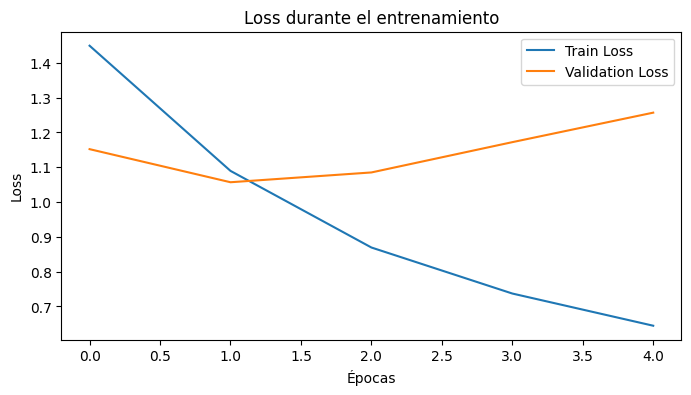

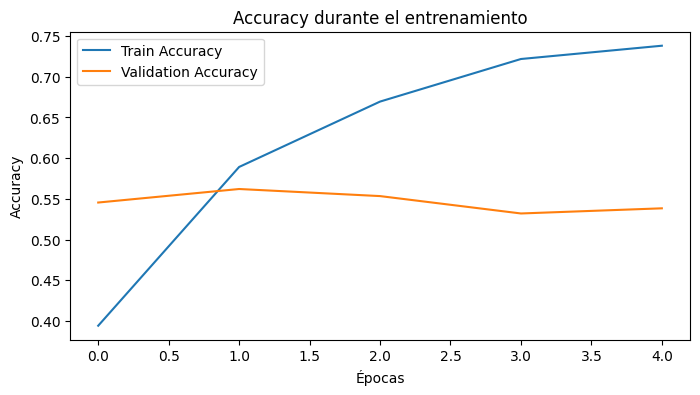

In [ ]:
# Gráficando proceso de entrenamiento
get_graph_history_train( history_train_LSTM )

### Arquitectura GRU

In [ ]:
# Estableciendo capas arquitectura
input_layer    = keras.Input( shape=(None,), dtype="int64" )
embedded_layer = layers.Embedding( input_dim=size_vocabulary, output_dim=256, mask_zero=True )( input_layer )
rnn_layer      = layers.Bidirectional( layers.GRU( units=64 ) )( embedded_layer )
x              = layers.Dropout( 0.3 )( rnn_layer )
output_layer   = layers.Dense( units=5, activation="softmax" )( x )

# Estableciendo modelo
model_norm_violations_GRU = keras.Model( inputs=input_layer, outputs=output_layer )

In [ ]:
# Definiendo configuraciones para el entrenamiento
model_norm_violations_GRU.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Revisando resumen de la arquitectura
model_norm_violations_GRU.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 256) │  6,400,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, None)      │          0 │ input_layer_1[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 128)       │    123,648 │ embedding_1[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 5)         │        645 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,524,293 (24.89 MB)

 Trainable params: 6,524,293 (24.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenando modelo
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",       # observa la pérdida en validación
    patience=2,               # se detiene si no mejora en 2 epochs
    restore_best_weights=True # conserva los mejores pesos
)

history_train_GRU = model_norm_violations_GRU.fit(
    train_dataset_indices,
    validation_data=valid_dataset_indices,
    epochs=10,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 173s 538ms/step - accuracy: 0.3945 - loss: 1.4524 - val_accuracy: 0.5668 - val_loss: 1.0499
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 170s 537ms/step - accuracy: 0.6503 - loss: 0.8559 - val_accuracy: 0.5660 - val_loss: 1.0460
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 170s 538ms/step - accuracy: 0.7243 - loss: 0.6170 - val_accuracy: 0.5447 - val_loss: 1.1366
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 173s 544ms/step - accuracy: 0.7559 - loss: 0.5389 - val_accuracy: 0.5502 - val_loss: 1.2750


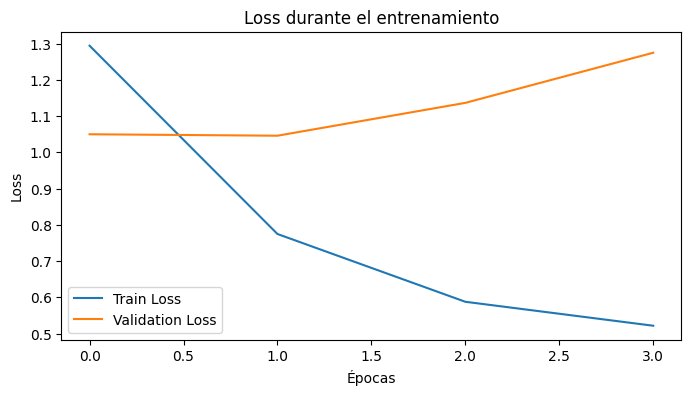

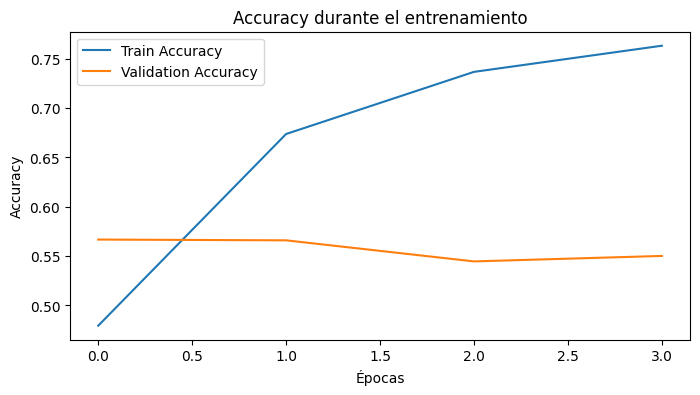

In [ ]:
# Gráficando proceso de entrenamiento
get_graph_history_train( history_train_GRU )

# Arquitectura transformer

Para esta parte, se implementará el bloque encoder que está en la arquitectura transformer.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import ops

In [ ]:
"""
  Link documentación: https://keras.io/api/layers/attention_layers/multi_head_attention/

  La siguiente clase integra todas las capas que tiene el bloque "encoder"
  del transformers.

  Esta es el flujo que se implementa en el bloque encoder:

  Input -> Multi-head attention -> Add(residual) -> LayerNorm -> Feed-Forward -> Add(residual) -> LayerNorm -> Output

  Puntos importantes a considerar:

  1. Función call:
    Dentro de esta función se define qué operaciones matemáticas se aplican a la entrada para producir la salida.
    Por lo tanto, en este caso, se usa cada capa que tiene el bloque encoder, pasando los resultados en cada uno, hasta
    obtener la salida que genera el bloque encoder.

    El resultado final que genera todo el bloque encoder se hace en la última capa "layernorm_2_output".

  2. Entrada "Input":
    Este es un tensor donde están todas las secuencias, según el batch_size definido, con sus vectores
    embeddings.

    Recordar que en cada secuencia hay un conjunto de tokens, donde a cada token se le asigna un vector
    embedding.

  3. Mask:
    Es una matriz booleana que le dice al bloque encoder qué posiciones o tokens de la secuencia
    son relleno "padding" y no deben influir en los cálculos.

    Por ejemplo:

    - Texto con padding: ["hola", "mundo", "<PAD>", "<PAD>"]
    - mask podría ser: [1, 1, 0, 0]
    (1 = usar, 0 = ignorar).

    En la atención cada token se relaciona con todos los demás. Si no se usa la máscara, entonces
    los tokens de relleno (padding) también recibirían y aportarían atención, "ensuciando" la representación.
"""
class TransformerEncoder(layers.Layer):

  def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
    super().__init__(**kwargs)

    self.embed_dim = embed_dim # Tamaño del vector embedding
    self.dense_dim = dense_dim
    self.num_heads = num_heads # Cantidad de capas self attention o head attention

    # ----------------------------------
    # Capa self attention o multi-head attention
    # ----------------------------------
    self.attention = layers.MultiHeadAttention( num_heads=num_heads, key_dim=(embed_dim//num_heads) )

    # ----------------------------------
    # Capa add & norm 1
    # ----------------------------------
    self.layernorm_1 = layers.LayerNormalization()

    # ----------------------------------
    # Capa feed forward - dos capas densas
    # ----------------------------------
    self.feed_forward = keras.Sequential([
        layers.Dense( dense_dim, activation="relu" ),
        layers.Dense( embed_dim ),
    ])

    # ----------------------------------
    # Capa add & norm 2
    # ----------------------------------
    self.layernorm_2 = layers.LayerNormalization()

  def call(self, inputs, mask=None):
    if mask is not None:
      mask = mask[:, tf.newaxis, :]

    # --------------------------------------------------------------------
    # Implementando capas encoder con conexiones residuales
    # --------------------------------------------------------------------
    attention_output    = self.attention( query=inputs, key=inputs, value=inputs, attention_mask=mask )
    layernorm_1_output  = self.layernorm_1( inputs + attention_output ) # Conexión residual 1
    feed_forward_output = self.feed_forward( layernorm_1_output )
    layernorm_2_output  = self.layernorm_2( layernorm_1_output + feed_forward_output ) # Conexión residual 2

    return layernorm_2_output # Regresando resultado que genera el bloque encoder

  def get_config(self):
    config = super().get_config()
    config.update({
        "embed_dim": self.embed_dim,
        "num_heads": self.num_heads,
        "dense_dim": self.dense_dim,
    })

    return config

In [ ]:
"""
 Esta clase se encarga de sumarle un vector position al vector embedding.
 De ese modo, se guarda la posición del token en la secuencia, mucho antes
 de que ingrese al bloque "encoder" o "decoder".
"""
class PositionalEmbedding(layers.Layer):

  def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
    super().__init__(**kwargs)

    self.sequence_length     = sequence_length
    self.input_dim           = input_dim
    self.output_dim          = output_dim

    self.token_embeddings    = layers.Embedding(input_dim=input_dim, output_dim=output_dim)       # Se generan los vectores embeddings
    self.position_embeddings = layers.Embedding(input_dim=sequence_length, output_dim=output_dim) # Se generan los vectores position embeddings

  def call(self, inputs):
    length             = tf.shape(inputs)[-1]
    positions          = tf.range(start=0, limit=length, delta=1)

    embedded_tokens    = self.token_embeddings(inputs)
    embedded_positions = self.position_embeddings(positions)

    return embedded_tokens + embedded_positions # Regresando resultado que genera la capa positional embedding

  def compute_mask(self, inputs, mask=None):
    return ops.not_equal(inputs, 0)

  def get_config(self):
    config = super().get_config()
    config.update({
        "output_dim"     : self.output_dim,
        "sequence_length": self.sequence_length,
        "input_dim"      : self.input_dim,
    })

    return config

### Modelo transformer versión 1

In [ ]:
size_sequence   = 600
size_vocabulary = 25000

In [ ]:
embed_dim = 256 # Tamaño del vector embedding
dense_dim = 512 # Cantidad de neuronas que tiene las capas densa en feed forward
num_heads = 1   # Número de capas multi-head attention

# Definiendo capas de la arquitectura del modelo con la capa position
input_layer    = keras.Input( shape=(None,), dtype="int64" )
position_layer = PositionalEmbedding( sequence_length=size_sequence, input_dim=size_vocabulary, output_dim=embed_dim )( input_layer )
encoder_layer  = TransformerEncoder( embed_dim, dense_dim, num_heads )( position_layer )
x              = layers.GlobalMaxPooling1D()( encoder_layer )
x              = layers.Dropout(0.5)(x)
output_layer   = layers.Dense( units=5, activation="softmax" )(x)

# Creando modelo con la arquitectura definida previamente
model_norm_violations_transform_v1 = keras.Model( inputs=input_layer, outputs=output_layer )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'transformer_encoder' (of type TransformerEncoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
# Revisando resumen de la arquitectura
model_norm_violations_transform_v1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, None, 256) │  6,553,600 │ input_layer[0][0] │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None)      │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encoder │ (None, None, 256) │    527,104 │ positional_embed… │
│ (TransformerEncode… │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ transformer_enco… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 5)         │      1,285 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,081,989 (27.02 MB)

 Trainable params: 7,081,989 (27.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Configuraciones para el entrenamiento
model_norm_violations_transform_v1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
# Entrenamiento del modelo transformer versión 1
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",       # observa la pérdida en validación
    patience=2,               # se detiene si no mejora en 2 epochs
    restore_best_weights=True # conserva los mejores pesos
)

history_transform_v1 = model_norm_violations_transform_v1.fit(
    train_dataset_indices,
    validation_data=valid_dataset_indices,
    epochs=10,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 509s 2s/step - accuracy: 0.2731 - loss: 2.1918 - val_accuracy: 0.5399 - val_loss: 1.1123
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 0.6002 - loss: 1.0134 - val_accuracy: 0.5755 - val_loss: 1.0111
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 0.7011 - loss: 0.7070 - val_accuracy: 0.5557 - val_loss: 1.2280
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 503s 2s/step - accuracy: 0.7521 - loss: 0.5664 - val_accuracy: 0.5415 - val_loss: 1.4178


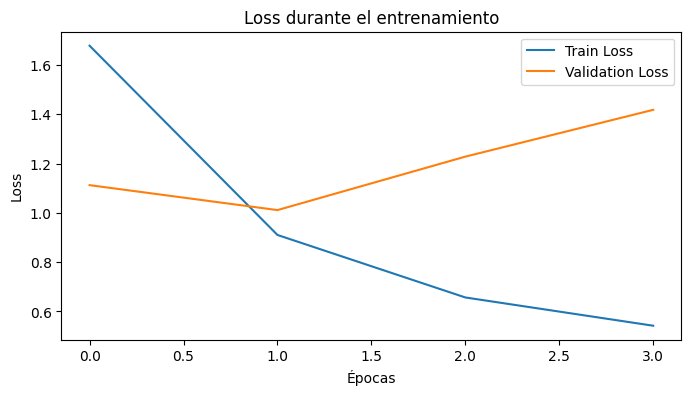

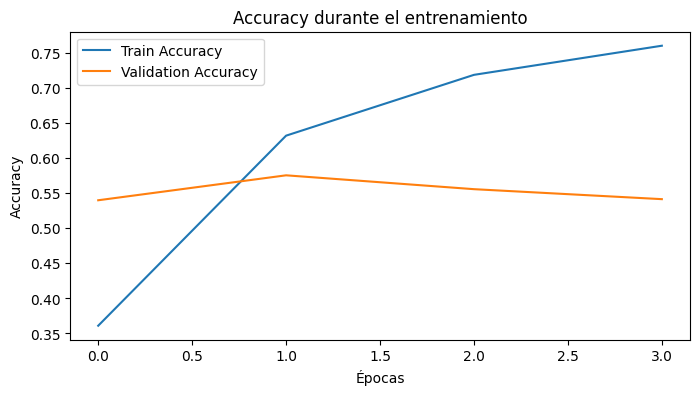

In [ ]:
# Gráficando proceso de entrenamiento
get_graph_history_train( history_transform_v1 )

### Modelo transformer versión 2

In [ ]:
embed_dim = 128 # Tamaño del vector embedding
dense_dim = 512 # Cantidad de neuronas que tiene las capas densa en feed forward
num_heads = 2   # Número de capas multi-head attention

# Definiendo capas de la arquitectura del modelo con la capa position
input_layer    = keras.Input( shape=(None,), dtype="int64" )
position_layer = PositionalEmbedding( sequence_length=size_sequence, input_dim=size_vocabulary, output_dim=embed_dim )( input_layer )
encoder_layer  = TransformerEncoder( embed_dim, dense_dim, num_heads )( position_layer )
x              = layers.GlobalMaxPooling1D()( encoder_layer )
x              = layers.Dropout(0.2)(x)
output_layer   = layers.Dense( units=5, activation="softmax" )(x)

# Creando modelo con la arquitectura definida previamente
model_norm_violations_transform_v2 = keras.Model( inputs=input_layer, outputs=output_layer )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'transformer_encoder_1' (of type TransformerEncoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
# Revisando resumen de la arquitectura
model_norm_violations_transform_v2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, None, 128) │  3,276,800 │ input_layer_3[0]… │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, None)      │          0 │ input_layer_3[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encode… │ (None, None, 128) │    198,272 │ positional_embed… │
│ (TransformerEncode… │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ transformer_enco… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 5)         │        645 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,475,717 (13.26 MB)

 Trainable params: 3,475,717 (13.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Configuraciones para el entrenamiento
model_norm_violations_transform_v2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
# Entrenamiento del modelo transformer versión 1
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",       # observa la pérdida en validación
    patience=2,               # se detiene si no mejora en 2 epochs
    restore_best_weights=True # conserva los mejores pesos
)

history_transform_v2 = model_norm_violations_transform_v2.fit(
    train_dataset_indices,
    validation_data=valid_dataset_indices,
    epochs=10,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.3327 - loss: 1.8287 - val_accuracy: 0.5660 - val_loss: 1.0728
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 0.6091 - loss: 0.9927 - val_accuracy: 0.5834 - val_loss: 0.9841
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 0.7057 - loss: 0.6887 - val_accuracy: 0.5684 - val_loss: 1.0479
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step - accuracy: 0.7500 - loss: 0.5719 - val_accuracy: 0.5431 - val_loss: 1.2072


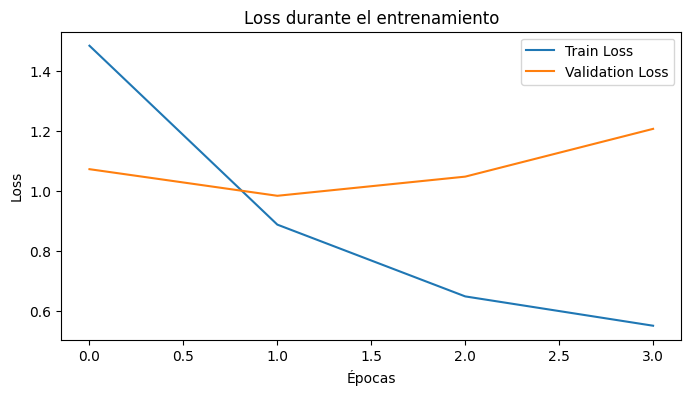

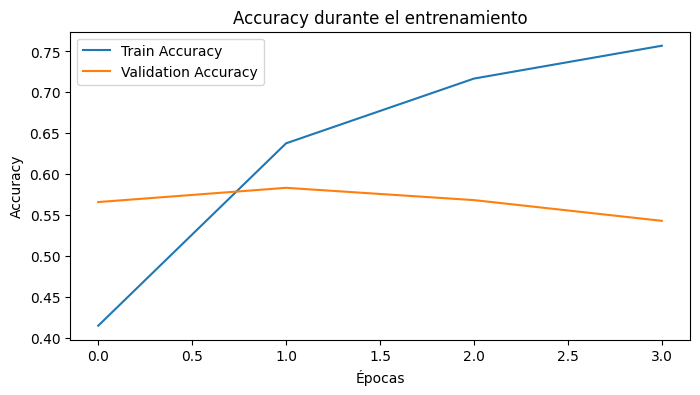

In [ ]:
# Gráficando proceso de entrenamiento
get_graph_history_train( history_transform_v2 )

# Empaquetando modelos

### Modelos RNNs

In [ ]:
# Creando empaquetado para el modelo LSTM
input_model   = keras.Input( shape=(), dtype="string" )
input_indices = tokenizer_layer( input_model )
output_model  = model_norm_violations_LSTM( input_indices )

# Modelo final LSTM
norm_violations_LSTM = keras.Model( inputs=input_model, outputs=output_model )

In [ ]:
# Guardar modelo LSTM
norm_violations_LSTM.save("norm_violations_LSTM.keras")
norm_violations_LSTM.save("norm_violations_LSTM.h5")

In [ ]:
# Creando empaquetado para el modelo GRU
input_model   = keras.Input( shape=(), dtype="string" )
input_indices = tokenizer_layer( input_model )
output_model  = model_norm_violations_GRU( input_indices )

# Modelo final GRU
norm_violations_GRU = keras.Model( inputs=input_model, outputs=output_model )

In [ ]:
# Guardar modelo GRU
norm_violations_GRU.save("norm_violations_GRU.keras")
norm_violations_GRU.save("norm_violations_GRU.h5")

### Modelos Transformers

In [ ]:
# Creando empaquetado para el modelo transformer v1
input_model   = keras.Input( shape=(), dtype="string" )
input_indices = tokenizer_layer( input_model )
output_model  = model_norm_violations_transform_v1( input_indices )

# Modelo final transformer v1
norm_violations_transform_v1 = keras.Model( inputs=input_model, outputs=output_model )

In [ ]:
# Guardar modelo transformer v1
norm_violations_transform_v1.save("norm_violations_transform_v1.keras")
norm_violations_transform_v1.save("norm_violations_transform_v1.h5")

In [ ]:
# Creando empaquetado para el modelo transformer v2
input_model   = keras.Input( shape=(), dtype="string" )
input_indices = tokenizer_layer( input_model )
output_model  = model_norm_violations_transform_v2( input_indices )

# Modelo final transformer v2
norm_violations_transform_v2 = keras.Model( inputs=input_model, outputs=output_model )

In [ ]:
# Guardar modelo transformer v2
norm_violations_transform_v2.save("norm_violations_transform_v2.keras")
norm_violations_transform_v2.save("norm_violations_transform_v2.h5")

# Pruebas modelos

In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [ ]:
def get_prediction_model( text, result_model ):
  # Obteniendo las probabilidades que generó el modelo
  probabilities = result_model.numpy()

  # Categorias
  categories = train_dataset.class_names

  # Obteniendo la posición de la probabilidad más alta predicha
  position_probability_category = np.argmax( probabilities )

  # Obteniendo el valor de la probabilidad
  value_probability = probabilities[0][position_probability_category]

  print(f"Comentario        : { text }")
  print(f"Categoría predicha: { categories[ position_probability_category ] }")
  print(f"Valor probabilidad: { value_probability }")
  print(f"Probabilidades    : { probabilities }")

In [ ]:
# Importando modelos guardados
norm_violations_LSTM           = keras.models.load_model("/content/norm_violations_LSTM.keras")
norm_violations_GRU            = keras.models.load_model("/content/norm_violations_GRU.keras")

In [ ]:
norm_violations_transformer_v1 = keras.models.load_model(
    "/content/norm_violations_transform_v1.keras",
    custom_objects={
        "PositionalEmbedding": PositionalEmbedding,
        "TransformerEncoder" : TransformerEncoder,
    }
)

norm_violations_transformer_v2 = keras.models.load_model(
    "/content/norm_violations_transform_v2.keras",
    custom_objects={
        "PositionalEmbedding": PositionalEmbedding,
        "TransformerEncoder" : TransformerEncoder,
    }
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'positional_embedding_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'transformer_encoder_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'transformer_encoder_1' (of type TransformerE

### Pruebas manuales

A continuación, se colocan comentarios para probar los modelos:

- **Misogynistic:** "how dare you say that i m the most righteous person ever you fucking cunt go kill yourself"
- **verbal-attacks-reddit:** "repost of the front page today stop fucking spewing garbage check before you post links"
- **personal-attacks:** "islam is not a fucking race of people damnit"
- **racist-homophobic:** "kill yourself you nigger faggot im the fucking law here bitchass"
- **verbal-attacks-sensitive:** "wou people are fucking obsessed this subforum is basically turning into r cringe"

In [ ]:
# Revisando modelo completo LSTM
norm_violations_LSTM.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 600)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional (Functional)         │ (None, 5)              │     6,572,933 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,572,933 (25.07 MB)

 Trainable params: 6,572,933 (25.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Ejecutando inferencia
text   = tf.convert_to_tensor(["kill yourself you nigger faggot im the fucking law here bitchass"])
result = norm_violations_LSTM(text)

# Revisando resultados
get_prediction_model( text=text, result_model=result )

Comentario        : [b'kill yourself you nigger faggot im the fucking law here bitchass']
Categoría predicha: racist-homophobic
Valor probabilidad: 0.7187312245368958
Probabilidades    : [[0.01305924 0.0294011  0.7187312  0.0393225  0.19948594]]


In [ ]:
# Revisando modelo completo GRU
norm_violations_GRU.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 600)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 5)              │     6,524,293 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,524,293 (24.89 MB)

 Trainable params: 6,524,293 (24.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Ejecutando inferencia
text   = tf.convert_to_tensor(["your title and comments in this thread heavily suggest you are drunk or high or stupid"])
result = norm_violations_GRU(text)

# Revisando resultados
get_prediction_model( text=text, result_model=result )

Comentario        : [b'your title and comments in this thread heavily suggest you are drunk or high or stupid']
Categoría predicha: verbal-attacks-sensitive
Valor probabilidad: 0.5349301099777222
Probabilidades    : [[0.03301385 0.39046815 0.03320614 0.00838169 0.5349301 ]]


In [ ]:
# Revisando modelo completo transformer v1
norm_violations_transformer_v1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 600)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 5)              │     7,081,989 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,081,989 (27.02 MB)

 Trainable params: 7,081,989 (27.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Ejecutando inferencia
text   = tf.convert_to_tensor(["kill yourself you nigger faggot im the fucking law here bitchass"])
result = norm_violations_transformer_v1(text)

# Revisando resultados
get_prediction_model( text=text, result_model=result )

Comentario        : [b'kill yourself you nigger faggot im the fucking law here bitchass']
Categoría predicha: racist-homophobic
Valor probabilidad: 0.5688719153404236
Probabilidades    : [[0.02222581 0.01078669 0.5688719  0.01467812 0.38343745]]


In [ ]:
# Revisando modelo completo transformer v2
norm_violations_transformer_v2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 600)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_4 (Functional)       │ (None, 5)              │     3,475,717 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,475,717 (13.26 MB)

 Trainable params: 3,475,717 (13.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Ejecutando inferencia
text   = tf.convert_to_tensor(["kill yourself you nigger faggot im the fucking law here bitchass"])
result = norm_violations_transformer_v2(text)

# Revisando resultados
get_prediction_model( text=text, result_model=result )

Comentario        : [b'kill yourself you nigger faggot im the fucking law here bitchass']
Categoría predicha: racist-homophobic
Valor probabilidad: 0.7418472170829773
Probabilidades    : [[0.05570262 0.01033987 0.7418472  0.00571871 0.1863915 ]]


### Pruebas con métricas y matrix de confusión

In [ ]:
# Importando librerías
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
"""
  Puntos a explicar:

  - X_test: contiene una lista de todos los comentarios.
  - y_test: contiene las etiquetas o categorías en formato entero.

  Por ejemplo:

  X_test = ["text_1", "text_2", ...]
  y_test = [1,0,4, ...]

  Sin embargo, el dataset test está en formato keras, y por tanto,
  hay que aplicar una transformación para que se puedan usar en
  librerías como "classification_report" y "confusion_matrix".

  Al inicio se definio un tamaño de batch de 32. Por lo tanto,
  cada batch tiene 32 textos o comentarios. Debido a esto,
  es necesario recorrer cada batch que tiene el "test_dataset"
  para convertir su contenido a arreglos Numpy.

  Cada iteración te da:

  - x_batch: un tensor con textos crudos (ej. ["texto1", "texto2", ...])
  - y_batch: un tensor con las etiquetas correspondientes (ej. [0, 1, 2, ...])
"""
X_test = []
y_test = []

# Iterando en cada batch que tiene el dataset test
for x_batch, y_batch in test_dataset:
  X_test.extend( [text.decode('utf-8') for text in x_batch.numpy()] )
  y_test.extend( y_batch.numpy() )

# Convirtiendo en un arreglo numpy
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# Visualizando cambios
for i, comentario in enumerate( X_test ):
  print(comentario)

  if i == 5: break

for i, categoria in enumerate( y_test ):
  print(categoria)

  if i == 5: break

fuck off with your sjw bullshite you pathetic trump supporting troll jesus wept you guys are dull as fuck
their hang yourself retard
speak english you fucking gook
or stop being a fucking pussy
usa auscuck land trump s message is america first get the fuck out of here you fucking commie shill bastard
lmao another hey look at me guys im alpha cuz u fuked a girl post lol
4
1
3
0
4
3


In [ ]:
# Extrayendo las categorías
categorias = test_dataset.class_names

print(f"Categorías: { categorias }")

Categorías: ['misogynistic', 'personal-attacks', 'racist-homophobic', 'verbal-attacks-reddit', 'verbal-attacks-sensitive']


In [ ]:
"""
 Creando función que permite reutilizar la lógica
 para crear una matriz de confusión
"""
def get_confusion_matrix(y_test, y_pred, title):
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categorias, yticklabels=categorias)

  plt.xlabel("Predicción")
  plt.ylabel("Real")
  plt.title(title)
  plt.show()

#### Modelo RNN

In [ ]:
"""
  Dado que el modelo recibe entradas de tipo Keras entonces
  se debe transformar. Para ello, se usa la opción "Dataset.from_tensor_slices".

  El procedimiento es el siguiente:

  1. Se toman cada 32 comentarios de la lista X_test para crear un batch.
  2. Se tienen grupos con 32 comentarios que puede procesar "predict".

  Ejemplo visual:

    Batch 1 → ["texto1", "texto2", ..., "texto32"]
    Batch 2 → ["texto33", "texto34", ..., "texto64"]
    ...
    Batch N → ["texto33", "texto34", ..., "texto64"]
"""

# Prediciendo resultados con el modelo LSTM
X_test_keras = tf.data.Dataset.from_tensor_slices(X_test).batch(32)

y_pred_probs = norm_violations_LSTM.predict( X_test_keras )
y_pred_LSTM  = np.argmax( y_pred_probs, axis=1 )

40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 406ms/step


In [ ]:
# Generando reporte de clasificación para LSTM
print( classification_report( y_test, y_pred_LSTM, target_names=categorias ) )

                          precision    recall  f1-score   support

            misogynistic       0.58      0.61      0.59       253
        personal-attacks       0.57      0.64      0.60       253
       racist-homophobic       0.53      0.55      0.54       253
   verbal-attacks-reddit       0.65      0.45      0.53       253
verbal-attacks-sensitive       0.53      0.57      0.55       253

                accuracy                           0.57      1265
               macro avg       0.57      0.57      0.56      1265
            weighted avg       0.57      0.57      0.56      1265



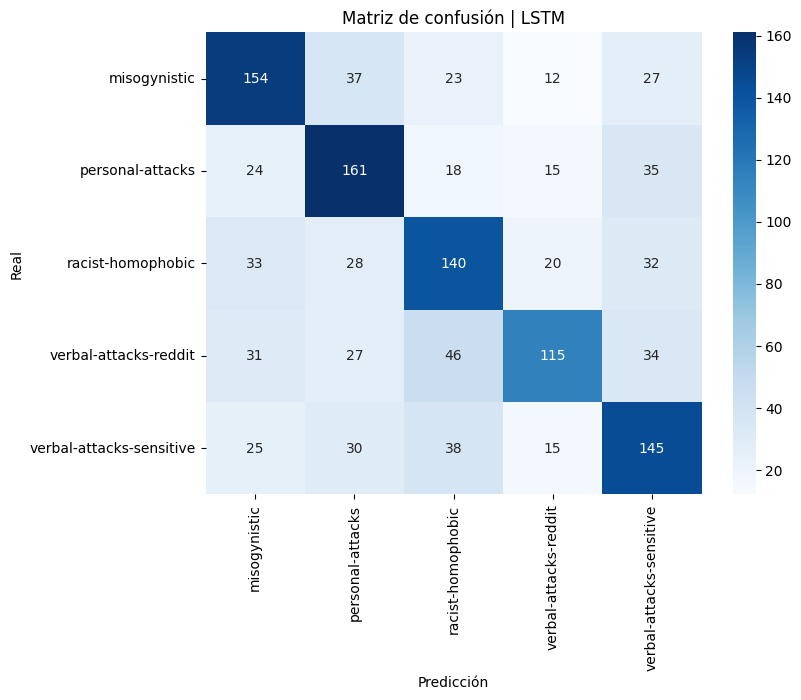

In [ ]:
# Generando matriz de confusión para LSTM
get_confusion_matrix( y_test, y_pred=y_pred_LSTM, title="Matriz de confusión | LSTM" )

In [ ]:
# Prediciendo resultados con el modelo GRU
X_test_keras = tf.data.Dataset.from_tensor_slices(X_test).batch(32)

y_pred_probs = norm_violations_GRU.predict( X_test_keras )
y_pred_GRU   = np.argmax( y_pred_probs, axis=1 )

40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 286ms/step


In [ ]:
# Generando reporte de clasificación para GRU
print( classification_report( y_test, y_pred_GRU, target_names=categorias ) )

                          precision    recall  f1-score   support

            misogynistic       0.57      0.62      0.59       253
        personal-attacks       0.54      0.63      0.58       253
       racist-homophobic       0.58      0.54      0.56       253
   verbal-attacks-reddit       0.62      0.58      0.60       253
verbal-attacks-sensitive       0.56      0.49      0.53       253

                accuracy                           0.57      1265
               macro avg       0.57      0.57      0.57      1265
            weighted avg       0.57      0.57      0.57      1265



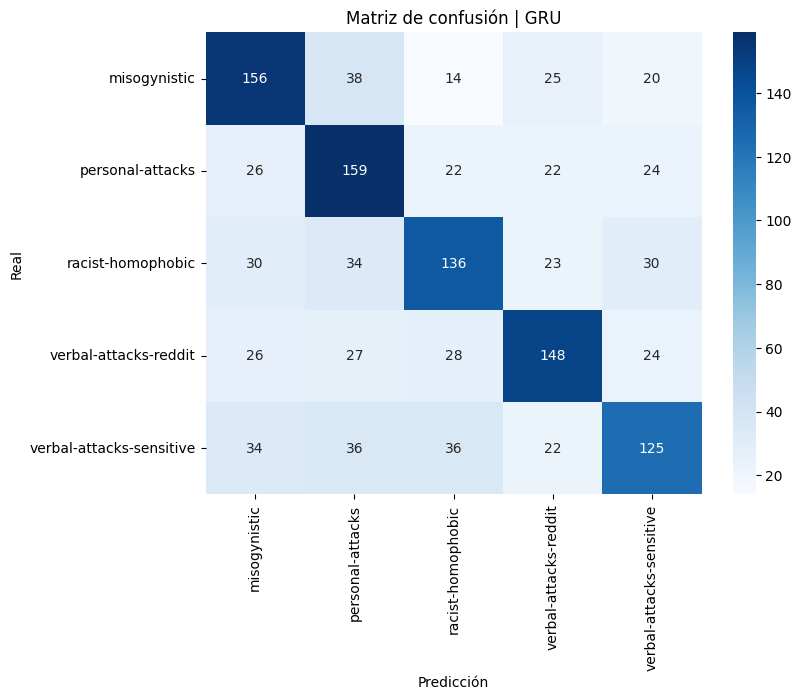

In [ ]:
# Generando matriz de confusión para GRU
get_confusion_matrix( y_test, y_pred=y_pred_GRU, title="Matriz de confusión | GRU" )

#### Modelo Transformer

In [ ]:
# Prediciendo resultados con el modelo transformer v1
X_test_keras = tf.data.Dataset.from_tensor_slices(X_test).batch(32)

y_pred_probs          = norm_violations_transformer_v1.predict( X_test_keras )
y_pred_trasnformer_v1 = np.argmax( y_pred_probs, axis=1 )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'transformer_encoder' (of type TransformerEncoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 826ms/step


In [ ]:
# Generando reporte de clasificación para transformer v1
print( classification_report( y_test, y_pred_trasnformer_v1, target_names=categorias ) )

                          precision    recall  f1-score   support

            misogynistic       0.62      0.55      0.58       253
        personal-attacks       0.59      0.54      0.56       253
       racist-homophobic       0.58      0.61      0.59       253
   verbal-attacks-reddit       0.57      0.58      0.57       253
verbal-attacks-sensitive       0.55      0.62      0.59       253

                accuracy                           0.58      1265
               macro avg       0.58      0.58      0.58      1265
            weighted avg       0.58      0.58      0.58      1265



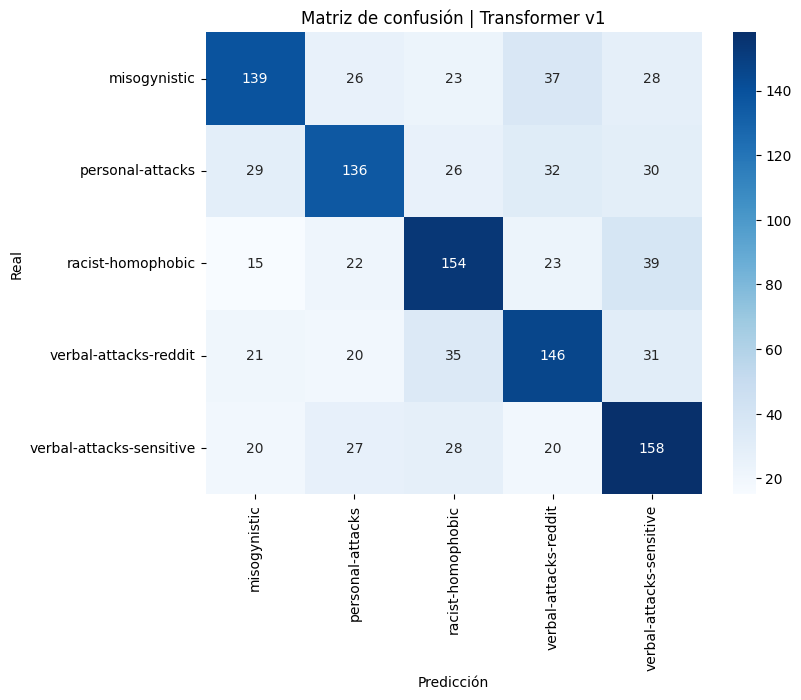

In [ ]:
# Generando matriz de confusión para transformer v1
get_confusion_matrix( y_test, y_pred=y_pred_trasnformer_v1, title="Matriz de confusión | Transformer v1" )

In [ ]:
# Prediciendo resultados con el modelo transformer v2
X_test_keras = tf.data.Dataset.from_tensor_slices(X_test).batch(32)

y_pred_probs          = norm_violations_transformer_v2.predict( X_test_keras )
y_pred_trasnformer_v2 = np.argmax( y_pred_probs, axis=1 )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'transformer_encoder_1' (of type TransformerEncoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 544ms/step


In [ ]:
# Generando reporte de clasificación para transformer v2
print( classification_report( y_test, y_pred_trasnformer_v2, target_names=categorias ) )

                          precision    recall  f1-score   support

            misogynistic       0.56      0.71      0.63       253
        personal-attacks       0.64      0.49      0.55       253
       racist-homophobic       0.60      0.66      0.63       253
   verbal-attacks-reddit       0.71      0.43      0.53       253
verbal-attacks-sensitive       0.54      0.69      0.61       253

                accuracy                           0.59      1265
               macro avg       0.61      0.59      0.59      1265
            weighted avg       0.61      0.59      0.59      1265



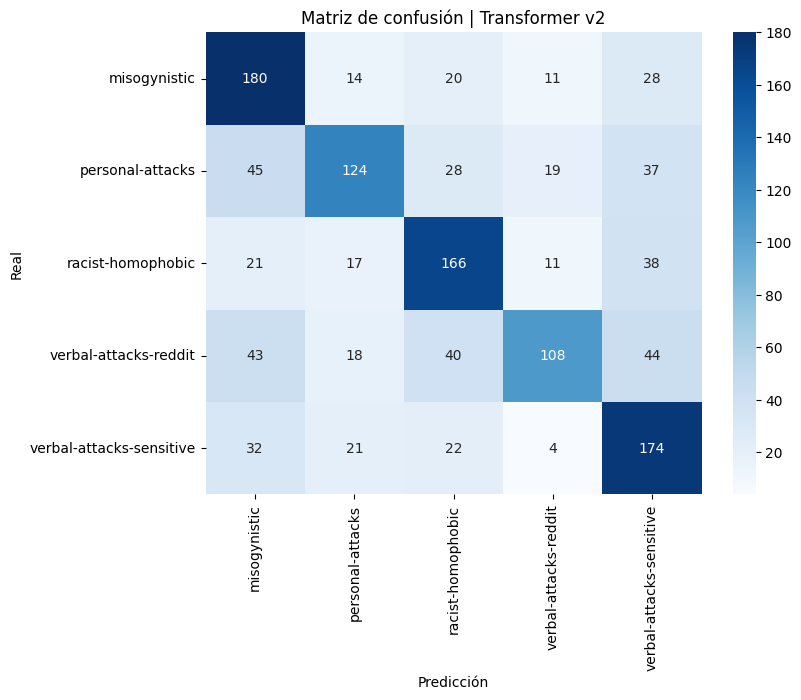

In [ ]:
# Generando matriz de confusión para transformer v2
get_confusion_matrix( y_test, y_pred=y_pred_trasnformer_v2, title="Matriz de confusión | Transformer v2" )

# Referencias

A continuación se agregan las referencias utilizadas:

* [1] C. Stryker and J. Holdsworth, “¿Qué es el procesamiento de lenguaje natural (PLN)?”, IBM Think. [En línea]. Disponible en: https://www.ibm.com/mx-es/think/topics/natural-language-processing
. [Accedido: 04-oct-2025].

* [2] C. Stryker, “¿Qué es una red neuronal recurrente (RNN)?”, IBM Think. [En línea]. Disponible en: https://www.ibm.com/es-es/think/topics/recurrent-neural-networks
. [Accedido: 04-oct-2025].

* [3] C. Stryker y D. Bergmann, “¿Qué es un modelo de transformador?”, IBM Think. [En línea]. Disponible en: https://www.ibm.com/es-es/think/topics/transformer-model
. [Accedido: 04-oct-2025].